In [24]:
# Let's first load and inspect the contents of the provided file to understand its structure and data.
import pandas as pd

# Load the CSV file
file_path = '/content/drive/MyDrive/Nasa/Nasa_final.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Cat,Country,Country.Name.x,Country.Name.y,Filtermeasure,Ggiclass,Iso3,Region,Region_new,Vclass,Dot.X,Dot.Y,GDP,GGI,Population,Sno,Vulner Index
0,unequal-morev,Afghanistan,Afghanistan,Afghanistan,GDP per capita,gender-unequal,AFG,South Asia,Asia and South Asia,more-vulnerable,35.022958,10.129762,363.674087,0.435,NaN,1,0.590
1,unequal-morev,Angola,Angola,Angola,GDP per capita,gender-unequal,AGO,Africa,Africa,more-vulnerable,38.219053,15.437690,2998.501158,0.638,NaN,4,0.510
2,equal-lessv,Albania,Albania,Albania,GDP per capita,gender-equal,ALB,Europe,Europe,less-vulnerable,15.608872,38.259918,6802.804519,0.787,NaN,2,0.395
3,equal-lessv,United Arab Emirates,United Arab Emirates,United Arab Emirates,GDP per capita,gender-equal,ARE,West Asia,Asia and South Asia,less-vulnerable,12.440528,32.471767,53757.863250,0.716,NaN,148,0.371
4,equal-lessv,Argentina,Argentina,Argentina,GDP per capita,gender-equal,ARG,South America,South America,less-vulnerable,6.657384,39.546214,13686.008670,0.756,NaN,5,0.384


In [25]:
data.columns

Index(['Cat', 'Country', 'Country.Name.x', 'Country.Name.y', 'Filtermeasure',
       'Ggiclass', 'Iso3', 'Region', 'Region_new', 'Vclass', 'Dot.X', 'Dot.Y',
       'GDP', 'GGI', 'Population', 'Sno', 'Vulner Index'],
      dtype='object')

In [26]:
# Check for missing values in the dataset
data.isnull().sum()

# Since 'Population' has missing values for all countries, we will drop that column
data_cleaned = data.drop(columns=['Population'])

# Drop rows with any remaining missing values
data_cleaned = data_cleaned.dropna()

# Check the cleaned data for any remaining issues
data_cleaned.isnull().sum(), data_cleaned.shape


(Cat               0
 Country           0
 Country.Name.x    0
 Country.Name.y    0
 Filtermeasure     0
 Ggiclass          0
 Iso3              0
 Region            0
 Region_new        0
 Vclass            0
 Dot.X             0
 Dot.Y             0
 GDP               0
 GGI               0
 Sno               0
 Vulner Index      0
 dtype: int64,
 (304, 16))

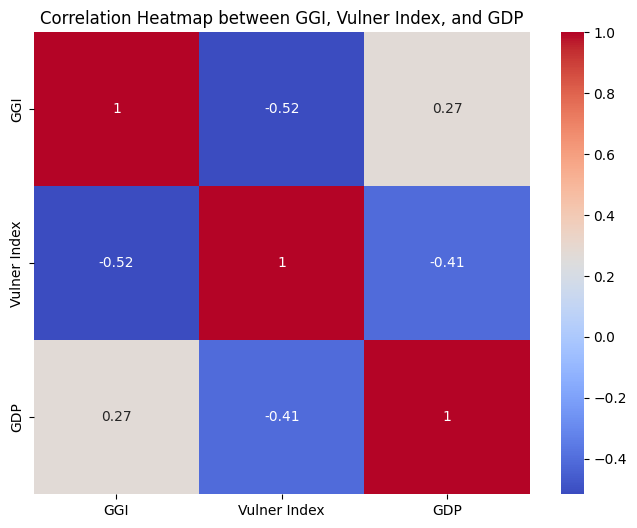

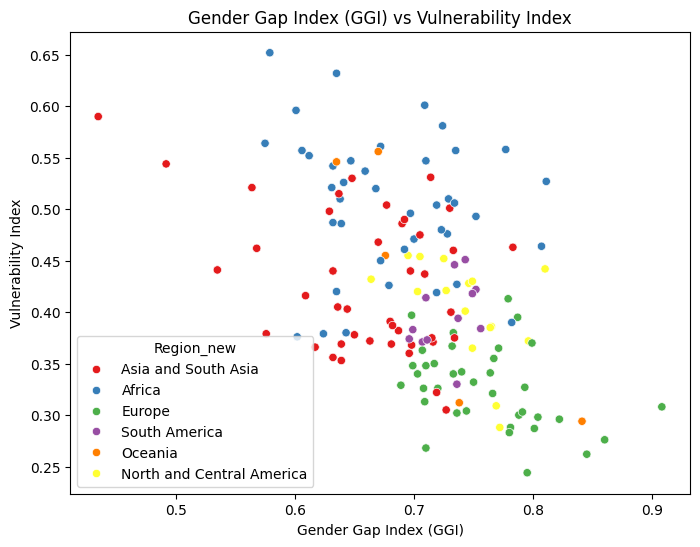

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



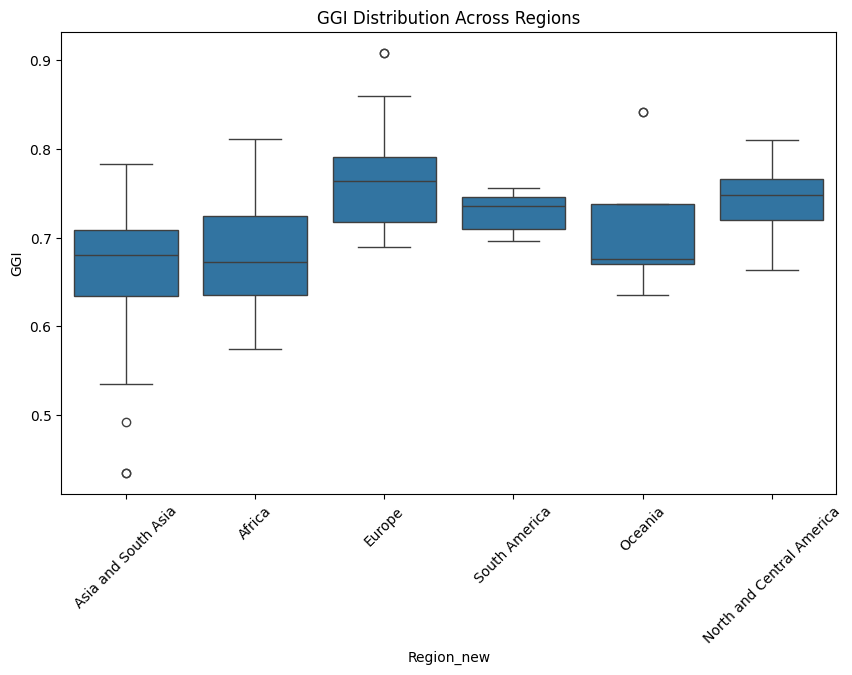

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



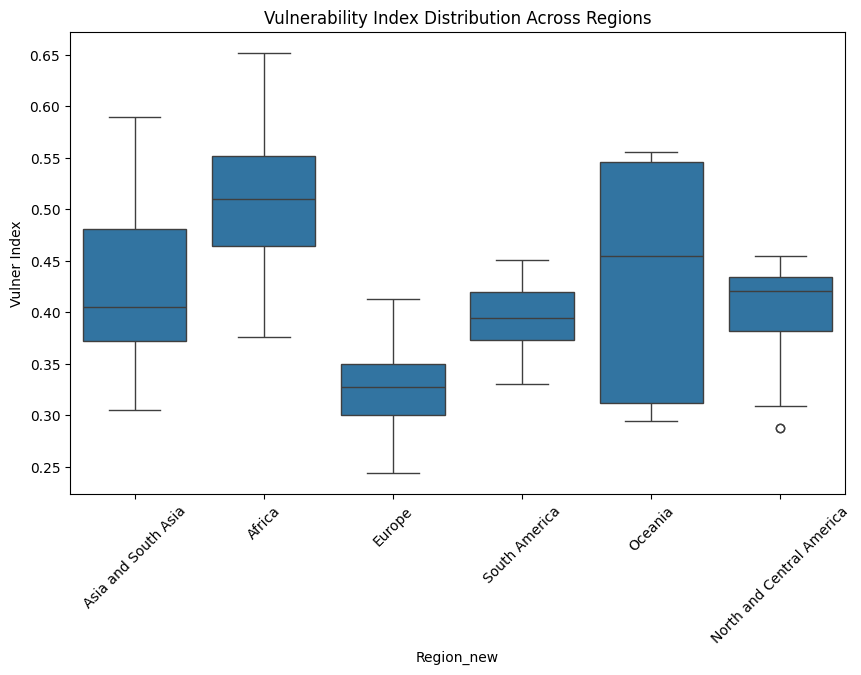

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap for key variables
plt.figure(figsize=(8, 6))
sns.heatmap(data_cleaned[['GGI', 'Vulner Index', 'GDP']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap between GGI, Vulner Index, and GDP")
plt.show()

# Scatter plot: GGI vs Vulner Index
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GGI', y='Vulner Index', hue='Region_new', data=data_cleaned, palette='Set1')
plt.title("Gender Gap Index (GGI) vs Vulnerability Index")
plt.xlabel("Gender Gap Index (GGI)")
plt.ylabel("Vulnerability Index")
plt.show()

# Boxplot for GGI across regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region_new', y='GGI', data=data_cleaned)
plt.title("GGI Distribution Across Regions")
plt.xticks(rotation=45)
plt.show()

# Boxplot for Vulner Index across regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region_new', y='Vulner Index', data=data_cleaned)
plt.title("Vulnerability Index Distribution Across Regions")
plt.xticks(rotation=45)
plt.show()


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare the data for modeling
X = data_cleaned[['GGI', 'GDP']]  # Independent variables: GGI and GDP
y = data_cleaned['Vulner Index']  # Dependent variable: Vulnerability Index

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using R-squared
r2 = r2_score(y_test, y_pred)
r2


0.33050895609902464

In [29]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features to capture non-linear relationships
poly = PolynomialFeatures(degree=2, include_bias=False)

# Select only numerical features for polynomial transformation
X_train_num = X_train[['GGI', 'GDP']]
X_test_num = X_test[['GGI', 'GDP']]

# Apply the polynomial transformation to the numerical features
X_train_poly = poly.fit_transform(X_train_num)
X_test_poly=poly.transform(X_test_num)

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [10, 20, None],  # Depth of trees
    'min_samples_split': [2, 5],  # Minimum samples to split a node
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

# Fit the model on the training data
grid_search.fit(X_train_poly, y_train)

# Get the best model after tuning
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test_poly)


R-squared: 0.3689562862516652
Mean Absolute Error: 0.05609595884493709


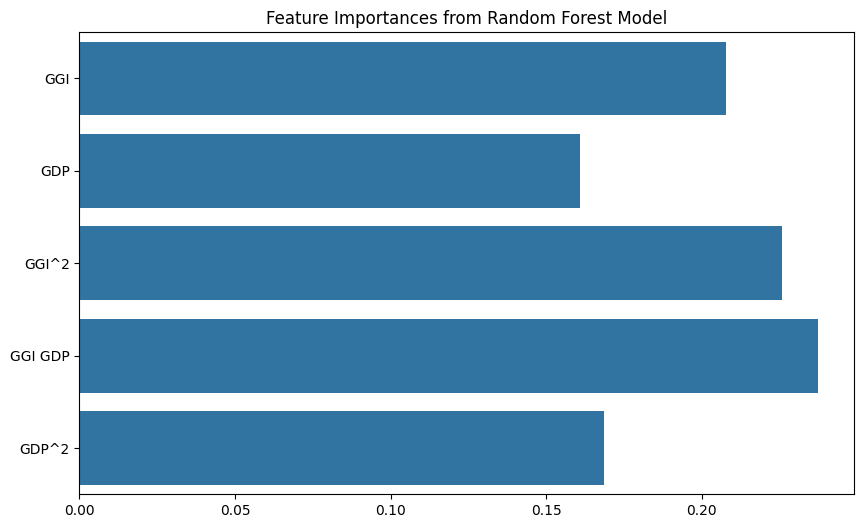

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Get feature importances from the model
importances = best_rf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=poly.get_feature_names_out())
plt.title("Feature Importances from Random Forest Model")
plt.show()


In [32]:
import pandas as pd

# Read the CSV file
file_path = '/content/drive/MyDrive/Nasa/Nasa_final.csv'
data = pd.read_csv(file_path)

# Convert the DataFrame to JSON
json_data = data.to_json(orient='records')

# Save the JSON data to a file (optional)
with open('data.json', 'w') as f:
    f.write(json_data)

In [33]:
import plotly.express as px
import plotly.graph_objects as go

# Scatter Plot for GGI vs Vulnerability Index (Actual and Predicted)
scatter_fig = px.scatter(
    x=X_test['GGI'],
    y=y_test,
    labels={'x': 'Gender Gap Index (GGI)', 'y': 'Actual Vulnerability Index'},
    title="GGI vs. Actual Vulnerability Index"
)

# Add Random Forest Predictions to the scatter plot
scatter_fig.add_trace(
    go.Scatter(
        x=X_test['GGI'],
        y=y_pred,
        mode='markers',
        marker=dict(color='red'),
        name='Predicted Vulnerability Index'
    )
)

scatter_fig.update_layout(
    title="Gender Gap Index vs Vulnerability Index (Actual vs Predicted)",
    xaxis_title="GGI",
    yaxis_title="Vulnerability Index"
)

scatter_fig.show()


In [36]:
import plotly.express as px

# Feature Importances for Random Forest
importances = best_rf.feature_importances_
features = poly.get_feature_names_out()

# Create a bar plot for feature importances
importance_fig = px.bar(
    x=importances,
    y=features,
    orientation='h',
    labels={'x': 'Importance', 'y': 'Feature'},
    title="Feature Importances from Random Forest"
)

importance_fig.show()


In [37]:
import plotly.express as px

# Assuming you have 'importances' and 'features' defined

importance_fig = px.bar(
    x=importances,
    y=features,
    orientation='h',
    labels={'x': 'Importance', 'y': 'Feature'},
    title="Feature Importances from Random Forest",
    color=features,  # Use features for color differentiation
    color_discrete_sequence=px.colors.qualitative.Set1  # Use a qualitative color sequence
)

importance_fig.show()